# Import file

In [114]:
# import library

import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

from shapely.geometry import Point, Polygon

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt

import libpysal
import warnings

# bikin list nama kota

In [3]:
# Make an array of all the city name
city_name = ["Bangkalan", "Banyuwangi", "Batu", "Blitar", "Bojonegoro", "Bondowoso", "Gresik", "Jember", "Jombang", "Kediri", "Kota_Blitar", "Kota_Madiun", "Kota_Malang", "Kota_Mojokerto", "Kota_Pasuruan", "Kota_Probolinggo", "Lamongan", "Lumajang", "Madiun", "Magetan", "Malang", "Mojokerto", "Nganjuk", "Ngawi", "Pacitan", "Pamekasan", "Pasuruan", "Ponorogo", "Probolinggo", "Sampang", "Sidoarjo", "Situbondo", "Sumenep", "Surabaya", "Trenggalek", "Tuban", "Tulungagung"]

city_name

['Bangkalan',
 'Banyuwangi',
 'Batu',
 'Blitar',
 'Bojonegoro',
 'Bondowoso',
 'Gresik',
 'Jember',
 'Jombang',
 'Kediri',
 'Kota_Blitar',
 'Kota_Madiun',
 'Kota_Malang',
 'Kota_Mojokerto',
 'Kota_Pasuruan',
 'Kota_Probolinggo',
 'Lamongan',
 'Lumajang',
 'Madiun',
 'Magetan',
 'Malang',
 'Mojokerto',
 'Nganjuk',
 'Ngawi',
 'Pacitan',
 'Pamekasan',
 'Pasuruan',
 'Ponorogo',
 'Probolinggo',
 'Sampang',
 'Sidoarjo',
 'Situbondo',
 'Sumenep',
 'Surabaya',
 'Trenggalek',
 'Tuban',
 'Tulungagung']

# Trial masukin data tanppa looping

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/main/apbd_2021/Sampang.csv')
df

,akun,anggaran,realisasi,persentase
0,Pendapatan Daerah,1871.47,1830.35,97.80
1,PAD,228.94,135.50,59.19
2,Pajak Daerah,36.21,31.00,85.60
3,Retribusi Daerah,32.13,20.90,65.04
4,Hasil Pengelolaan Kekayaan Daerah yan...,25.38,5.77,22.76
5,Lain-Lain PAD yang Sah,135.22,77.83,57.56
6,TKDD,1500.48,1430.97,95.37
7,Pendapatan Transfer Pemerintah Pusat,1500.48,1430.97,95.37
8,Pendapatan Lainnya,142.05,263.88,185.77
9,Pendapatan Transfer Antar Daerah,67.49,141.80,210.11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   akun        40 non-null     object 
 1   anggaran    31 non-null     float64
 2   realisasi   31 non-null     float64
 3   persentase  31 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.4+ KB


# Masukin Data pake looping

In [70]:
data = pd.DataFrame()

for i in city_name:
  df = pd.read_csv('https://raw.githubusercontent.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/main/data/apbd_2021/'+i+'.csv')
  df = df.drop(columns=['realisasi', 'persentase'])
  df.rename(columns = {'akun':'index'}, inplace = True)
  df.rename(columns = {'anggaran':i}, inplace = True)
  df = df.T
  if len(data) != 0:
    df = df.drop(['index'])
  data = pd.concat([data,df])

data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
index,Pendapatan Daerah,PAD,Pajak Daerah,Retribusi Daerah,Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan,Lain-Lain PAD yang Sah,TKDD,Pendapatan Transfer Pemerintah Pusat,Pendapatan Lainnya,Pendapatan Transfer Antar Daerah,...,Penjualan Kekayaan Daerah yang Dipisahkan,Penerimaan Pinjaman Daerah,Penerimaan Kembali Pemberian Pinjaman Daerah,Penerimaan Pembiayaan Lainnya Sesuai dengan Ke...,Pengeluaran Pembiayaan Daerah,Pembentukan Dana Cadangan,Penyertaanodal Daerah,Pembayaran Cicilan Pokok Utang yang Jatuh Tempo,Pemberian Pinjaman Daerah,Pengeluaran Pembiayaan Lainnya Sesuai dengan K...
Bangkalan,2223.07,262.47,54.72,22.92,4.4,180.44,1734.28,1734.28,226.31,131.78,...,0.0,0.0,0.0,0.0,24.75,20.0,4.75,0.0,0.0,0.0
Banyuwangi,3036.32,592.74,224.77,72.95,24.38,270.64,2200.95,2200.95,242.63,108.66,...,NaN,NaN,NaN,NaN,4.4,NaN,4.4,NaN,NaN,NaN
Batu,998.77,200.0,149.52,18.16,4.23,28.08,689.97,689.97,108.8,92.7,...,NaN,NaN,NaN,NaN,5.65,NaN,5.65,NaN,NaN,NaN
Blitar,2280.05,284.05,90.99,39.39,2.18,151.49,1766.78,1766.78,229.22,143.07,...,NaN,NaN,0.0,NaN,1.45,NaN,1.45,NaN,NaN,NaN
Bojonegoro,3788.74,691.31,99.39,40.25,144.61,407.06,2894.85,2894.85,202.58,104.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bondowoso,1999.23,233.31,41.3,28.6,4.2,159.21,1614.27,1614.27,151.66,91.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gresik,3271.54,1132.3,724.0,134.29,14.01,260.0,1710.22,1710.22,429.02,358.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jember,3708.36,716.85,223.42,42.2,6.1,445.13,2569.37,2569.37,422.14,219.9,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jombang,2609.85,477.85,120.0,15.34,3.43,339.08,1899.18,1899.18,232.82,134.53,...,NaN,20.0,0.0,NaN,40.0,20.0,0.0,20.0,NaN,NaN


# Check Datanya

In [71]:
data.shape

(38, 40)

38 Row padahal ada 37 city, karena row paling yang harusnya jadi header malah di row

# Ganti Nama kolom data frame

In [72]:
# Change the column name
data2 = data
data2.columns = data2.iloc[0]
#data.drop(data.index[1])
data2 = data.iloc[1:]

# Clean column names
data2 = data2.rename(columns=lambda x:x.lower().replace(' ','_'))

data2

index,pendapatan_daerah,pad,pajak_daerah,retribusi_daerah,hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan,lain-lain_pad_yang_sah,tkdd,pendapatan_transfer_pemerintah_pusat,pendapatan_lainnya,pendapatan_transfer_antar_daerah,...,penjualan_kekayaan_daerah_yang_dipisahkan,penerimaan_pinjaman_daerah,penerimaan_kembali_pemberian_pinjaman_daerah,penerimaan_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan,pengeluaran_pembiayaan_daerah,pembentukan_dana_cadangan,penyertaanodal_daerah,pembayaran_cicilan_pokok_utang_yang_jatuh_tempo,pemberian_pinjaman_daerah,pengeluaran_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan
Bangkalan,2223.07,262.47,54.72,22.92,4.4,180.44,1734.28,1734.28,226.31,131.78,...,0.0,0.0,0.0,0.0,24.75,20.0,4.75,0.0,0.0,0.0
Banyuwangi,3036.32,592.74,224.77,72.95,24.38,270.64,2200.95,2200.95,242.63,108.66,...,NaN,NaN,NaN,NaN,4.4,NaN,4.4,NaN,NaN,NaN
Batu,998.77,200.0,149.52,18.16,4.23,28.08,689.97,689.97,108.8,92.7,...,NaN,NaN,NaN,NaN,5.65,NaN,5.65,NaN,NaN,NaN
Blitar,2280.05,284.05,90.99,39.39,2.18,151.49,1766.78,1766.78,229.22,143.07,...,NaN,NaN,0.0,NaN,1.45,NaN,1.45,NaN,NaN,NaN
Bojonegoro,3788.74,691.31,99.39,40.25,144.61,407.06,2894.85,2894.85,202.58,104.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bondowoso,1999.23,233.31,41.3,28.6,4.2,159.21,1614.27,1614.27,151.66,91.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gresik,3271.54,1132.3,724.0,134.29,14.01,260.0,1710.22,1710.22,429.02,358.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jember,3708.36,716.85,223.42,42.2,6.1,445.13,2569.37,2569.37,422.14,219.9,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jombang,2609.85,477.85,120.0,15.34,3.43,339.08,1899.18,1899.18,232.82,134.53,...,NaN,20.0,0.0,NaN,40.0,20.0,0.0,20.0,NaN,NaN
Kediri,2777.29,425.69,210.02,26.34,8.92,180.41,2198.81,2198.81,152.78,131.87,...,NaN,NaN,9.55,NaN,5.0,NaN,5.0,NaN,NaN,NaN


# Clean Data

In [73]:
data2.dtypes

index
pendapatan_daerah                                                                      object
pad                                                                                    object
pajak_daerah                                                                           object
retribusi_daerah                                                                       object
hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan                                      object
lain-lain_pad_yang_sah                                                                 object
tkdd                                                                                   object
pendapatan_transfer_pemerintah_pusat                                                   object
pendapatan_lainnya                                                                     object
pendapatan_transfer_antar_daerah                                                       object
pendapatan_hibah                                      

In [74]:
data2 = data2.replace(0, np.NaN)
data2

index,pendapatan_daerah,pad,pajak_daerah,retribusi_daerah,hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan,lain-lain_pad_yang_sah,tkdd,pendapatan_transfer_pemerintah_pusat,pendapatan_lainnya,pendapatan_transfer_antar_daerah,...,penjualan_kekayaan_daerah_yang_dipisahkan,penerimaan_pinjaman_daerah,penerimaan_kembali_pemberian_pinjaman_daerah,penerimaan_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan,pengeluaran_pembiayaan_daerah,pembentukan_dana_cadangan,penyertaanodal_daerah,pembayaran_cicilan_pokok_utang_yang_jatuh_tempo,pemberian_pinjaman_daerah,pengeluaran_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan
Bangkalan,2223.07,262.47,54.72,22.92,4.40,180.44,1734.28,1734.28,226.31,131.78,...,NaN,NaN,NaN,NaN,24.75,20.0,4.75,NaN,NaN,NaN
Banyuwangi,3036.32,592.74,224.77,72.95,24.38,270.64,2200.95,2200.95,242.63,108.66,...,NaN,NaN,NaN,NaN,4.40,NaN,4.40,NaN,NaN,NaN
Batu,998.77,200.00,149.52,18.16,4.23,28.08,689.97,689.97,108.80,92.70,...,NaN,NaN,NaN,NaN,5.65,NaN,5.65,NaN,NaN,NaN
Blitar,2280.05,284.05,90.99,39.39,2.18,151.49,1766.78,1766.78,229.22,143.07,...,NaN,NaN,NaN,NaN,1.45,NaN,1.45,NaN,NaN,NaN
Bojonegoro,3788.74,691.31,99.39,40.25,144.61,407.06,2894.85,2894.85,202.58,104.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bondowoso,1999.23,233.31,41.30,28.60,4.20,159.21,1614.27,1614.27,151.66,91.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gresik,3271.54,1132.30,724.00,134.29,14.01,260.00,1710.22,1710.22,429.02,358.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jember,3708.36,716.85,223.42,42.20,6.10,445.13,2569.37,2569.37,422.14,219.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jombang,2609.85,477.85,120.00,15.34,3.43,339.08,1899.18,1899.18,232.82,134.53,...,NaN,20.00,NaN,NaN,40.00,20.0,NaN,20.00,NaN,NaN
Kediri,2777.29,425.69,210.02,26.34,8.92,180.41,2198.81,2198.81,152.78,131.87,...,NaN,NaN,9.55,NaN,5.00,NaN,5.00,NaN,NaN,NaN


# Check Data types

In [75]:
data2.dtypes

index
pendapatan_daerah                                                                      float64
pad                                                                                    float64
pajak_daerah                                                                           float64
retribusi_daerah                                                                       float64
hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan                                      float64
lain-lain_pad_yang_sah                                                                 float64
tkdd                                                                                   float64
pendapatan_transfer_pemerintah_pusat                                                   float64
pendapatan_lainnya                                                                     float64
pendapatan_transfer_antar_daerah                                                       float64
pendapatan_hibah                            

# Parse datanya  (ini gak perlu)

In [28]:
cols = data2.columns

cols

Index(['pendapatan_daerah', 'pad', 'pajak_daerah', 'retribusi_daerah',
       'hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan',
       'lain-lain_pad_yang_sah', 'tkdd',
       'pendapatan_transfer_pemerintah_pusat', 'pendapatan_lainnya',
       'pendapatan_transfer_antar_daerah', 'pendapatan_hibah', 'dana_darurat',
       'lain-lain_pendapatan_sesuai_dengan_ketentuan_peraturan_perundang-undangan',
       'belanja_daerah', 'belanja_pegawai', 'belanja_barang_jasa',
       'belanjaodal', 'belanja_lainnya', 'belanja_bunga', 'belanja_subsidi',
       'belanja_hibah', 'belanja_bantuan_sosial', 'belanja_tidak_terduga',
       'belanja_bagi_hasil', 'belanja_bantuan_keuangan', 'surplus/(defisit)',
       'pembiayaan_daerah', 'penerimaan_pembiayaan_daerah',
       'sisa_lebih_perhitungan_anggaran_tahun_sebelumnya',
       'pencairan_dana_cadangan', 'penjualan_kekayaan_daerah_yang_dipisahkan',
       'penerimaan_pinjaman_daerah',
       'penerimaan_kembali_pemberian_pinjaman_daerah',
       'p

In [64]:
data2[cols] = data2[cols].apply(pd.to_numeric, errors='coerce')
data2.dtypes

city
pendapatan_daerah                                                                      float64
pad                                                                                    float64
pajak_daerah                                                                           float64
retribusi_daerah                                                                       float64
hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan                                      float64
lain-lain_pad_yang_sah                                                                 float64
tkdd                                                                                   float64
pendapatan_transfer_pemerintah_pusat                                                   float64
pendapatan_lainnya                                                                     float64
pendapatan_transfer_antar_daerah                                                       float64
pendapatan_hibah                             

# Reset Index

In [76]:
data2 = data2.reset_index()
data2

index,index,pendapatan_daerah,pad,pajak_daerah,retribusi_daerah,hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan,lain-lain_pad_yang_sah,tkdd,pendapatan_transfer_pemerintah_pusat,pendapatan_lainnya,...,penjualan_kekayaan_daerah_yang_dipisahkan,penerimaan_pinjaman_daerah,penerimaan_kembali_pemberian_pinjaman_daerah,penerimaan_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan,pengeluaran_pembiayaan_daerah,pembentukan_dana_cadangan,penyertaanodal_daerah,pembayaran_cicilan_pokok_utang_yang_jatuh_tempo,pemberian_pinjaman_daerah,pengeluaran_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan
0,Bangkalan,2223.07,262.47,54.72,22.92,4.40,180.44,1734.28,1734.28,226.31,...,NaN,NaN,NaN,NaN,24.75,20.0,4.75,NaN,NaN,NaN
1,Banyuwangi,3036.32,592.74,224.77,72.95,24.38,270.64,2200.95,2200.95,242.63,...,NaN,NaN,NaN,NaN,4.40,NaN,4.40,NaN,NaN,NaN
2,Batu,998.77,200.00,149.52,18.16,4.23,28.08,689.97,689.97,108.80,...,NaN,NaN,NaN,NaN,5.65,NaN,5.65,NaN,NaN,NaN
3,Blitar,2280.05,284.05,90.99,39.39,2.18,151.49,1766.78,1766.78,229.22,...,NaN,NaN,NaN,NaN,1.45,NaN,1.45,NaN,NaN,NaN
4,Bojonegoro,3788.74,691.31,99.39,40.25,144.61,407.06,2894.85,2894.85,202.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bondowoso,1999.23,233.31,41.30,28.60,4.20,159.21,1614.27,1614.27,151.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Gresik,3271.54,1132.30,724.00,134.29,14.01,260.00,1710.22,1710.22,429.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Jember,3708.36,716.85,223.42,42.20,6.10,445.13,2569.37,2569.37,422.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Jombang,2609.85,477.85,120.00,15.34,3.43,339.08,1899.18,1899.18,232.82,...,NaN,20.00,NaN,NaN,40.00,20.0,NaN,20.00,NaN,NaN
9,Kediri,2777.29,425.69,210.02,26.34,8.92,180.41,2198.81,2198.81,152.78,...,NaN,NaN,9.55,NaN,5.00,NaN,5.00,NaN,NaN,NaN


In [77]:
data2.rename(columns = {'index':'city'}, inplace = True)
data2

index,city,pendapatan_daerah,pad,pajak_daerah,retribusi_daerah,hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan,lain-lain_pad_yang_sah,tkdd,pendapatan_transfer_pemerintah_pusat,pendapatan_lainnya,...,penjualan_kekayaan_daerah_yang_dipisahkan,penerimaan_pinjaman_daerah,penerimaan_kembali_pemberian_pinjaman_daerah,penerimaan_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan,pengeluaran_pembiayaan_daerah,pembentukan_dana_cadangan,penyertaanodal_daerah,pembayaran_cicilan_pokok_utang_yang_jatuh_tempo,pemberian_pinjaman_daerah,pengeluaran_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan
0,Bangkalan,2223.07,262.47,54.72,22.92,4.40,180.44,1734.28,1734.28,226.31,...,NaN,NaN,NaN,NaN,24.75,20.0,4.75,NaN,NaN,NaN
1,Banyuwangi,3036.32,592.74,224.77,72.95,24.38,270.64,2200.95,2200.95,242.63,...,NaN,NaN,NaN,NaN,4.40,NaN,4.40,NaN,NaN,NaN
2,Batu,998.77,200.00,149.52,18.16,4.23,28.08,689.97,689.97,108.80,...,NaN,NaN,NaN,NaN,5.65,NaN,5.65,NaN,NaN,NaN
3,Blitar,2280.05,284.05,90.99,39.39,2.18,151.49,1766.78,1766.78,229.22,...,NaN,NaN,NaN,NaN,1.45,NaN,1.45,NaN,NaN,NaN
4,Bojonegoro,3788.74,691.31,99.39,40.25,144.61,407.06,2894.85,2894.85,202.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bondowoso,1999.23,233.31,41.30,28.60,4.20,159.21,1614.27,1614.27,151.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Gresik,3271.54,1132.30,724.00,134.29,14.01,260.00,1710.22,1710.22,429.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Jember,3708.36,716.85,223.42,42.20,6.10,445.13,2569.37,2569.37,422.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Jombang,2609.85,477.85,120.00,15.34,3.43,339.08,1899.18,1899.18,232.82,...,NaN,20.00,NaN,NaN,40.00,20.0,NaN,20.00,NaN,NaN
9,Kediri,2777.29,425.69,210.02,26.34,8.92,180.41,2198.81,2198.81,152.78,...,NaN,NaN,9.55,NaN,5.00,NaN,5.00,NaN,NaN,NaN


# Nyamain nama kolom city

In [81]:
data2['city'] = data2['city'].str.lower().replace(' ','_')
data2['city'] = data2['city'].str.replace(' ','_')
data2

index,city,pendapatan_daerah,pad,pajak_daerah,retribusi_daerah,hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan,lain-lain_pad_yang_sah,tkdd,pendapatan_transfer_pemerintah_pusat,pendapatan_lainnya,...,penjualan_kekayaan_daerah_yang_dipisahkan,penerimaan_pinjaman_daerah,penerimaan_kembali_pemberian_pinjaman_daerah,penerimaan_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan,pengeluaran_pembiayaan_daerah,pembentukan_dana_cadangan,penyertaanodal_daerah,pembayaran_cicilan_pokok_utang_yang_jatuh_tempo,pemberian_pinjaman_daerah,pengeluaran_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan
0,bangkalan,2223.07,262.47,54.72,22.92,4.40,180.44,1734.28,1734.28,226.31,...,NaN,NaN,NaN,NaN,24.75,20.0,4.75,NaN,NaN,NaN
1,banyuwangi,3036.32,592.74,224.77,72.95,24.38,270.64,2200.95,2200.95,242.63,...,NaN,NaN,NaN,NaN,4.40,NaN,4.40,NaN,NaN,NaN
2,batu,998.77,200.00,149.52,18.16,4.23,28.08,689.97,689.97,108.80,...,NaN,NaN,NaN,NaN,5.65,NaN,5.65,NaN,NaN,NaN
3,blitar,2280.05,284.05,90.99,39.39,2.18,151.49,1766.78,1766.78,229.22,...,NaN,NaN,NaN,NaN,1.45,NaN,1.45,NaN,NaN,NaN
4,bojonegoro,3788.74,691.31,99.39,40.25,144.61,407.06,2894.85,2894.85,202.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bondowoso,1999.23,233.31,41.30,28.60,4.20,159.21,1614.27,1614.27,151.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gresik,3271.54,1132.30,724.00,134.29,14.01,260.00,1710.22,1710.22,429.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,jember,3708.36,716.85,223.42,42.20,6.10,445.13,2569.37,2569.37,422.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,jombang,2609.85,477.85,120.00,15.34,3.43,339.08,1899.18,1899.18,232.82,...,NaN,20.00,NaN,NaN,40.00,20.0,NaN,20.00,NaN,NaN
9,kediri,2777.29,425.69,210.02,26.34,8.92,180.41,2198.81,2198.81,152.78,...,NaN,NaN,9.55,NaN,5.00,NaN,5.00,NaN,NaN,NaN


In [83]:
data2.dtypes

index
city                                                                                    object
pendapatan_daerah                                                                      float64
pad                                                                                    float64
pajak_daerah                                                                           float64
retribusi_daerah                                                                       float64
hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan                                      float64
lain-lain_pad_yang_sah                                                                 float64
tkdd                                                                                   float64
pendapatan_transfer_pemerintah_pusat                                                   float64
pendapatan_lainnya                                                                     float64
pendapatan_transfer_antar_daerah            

# check Null Value (!!pake grafik - optional)

In [29]:
data2.count()

city
pendapatan_daerah                                                                      37
pad                                                                                    37
pajak_daerah                                                                           37
retribusi_daerah                                                                       37
hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan                                      37
lain-lain_pad_yang_sah                                                                 37
tkdd                                                                                   37
pendapatan_transfer_pemerintah_pusat                                                   37
pendapatan_lainnya                                                                     37
pendapatan_transfer_antar_daerah                                                       37
pendapatan_hibah                                                                       16
dana_

# Check data description

# Visualize Data Distribution

# Variable yang mau Awak dewe pake??
-

# Load boundaries city in Indonesia

url = 'https://github.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/raw/main/data/city_level_boundaries/gadm41_IDN_city_level.zip'

! wget $url

In [33]:
url = 'https://github.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/raw/main/data/city_level_boundaries/gadm41_IDN_city.zip'

! wget $url

--2023-04-21 17:25:48--  https://github.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/raw/main/data/city_level_boundaries/gadm41_IDN_city.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/main/data/city_level_boundaries/gadm41_IDN_city.zip [following]
--2023-04-21 17:25:49--  https://raw.githubusercontent.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/main/data/city_level_boundaries/gadm41_IDN_city.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27269954 (26M) [application/zip]
Saving to: ‘gadm41_IDN_city.zip’

gadm41_IDN_city.z

In [49]:
gdf = gpd.read_file(f"zip://gadm41_IDN_city.zip!gadm41_IDN_city.shp")
gdf2 = gdf.rename(columns=lambda x:x.lower().replace(' ','_'))
gdf2.head()

,gid_2,gid_0,country,gid_1,name_1,nl_name_1,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geometry
0,IDN.1.2_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Barat,NA,NA,Kabupaten,Regency,1107,ID.AC.AB,"POLYGON ((96.06915 4.19539, 96.06725 4.19651, ..."
1,IDN.1.1_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Barat Daya,NA,NA,Kabupaten,Regency,1112,ID.AC.AD,"MULTIPOLYGON (((96.94196 3.57464, 96.94110 3.5..."
2,IDN.1.3_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Besar,NA,NA,Kabupaten,Regency,1108,ID.AC.AR,"MULTIPOLYGON (((95.78426 5.24092, 95.78445 5.2..."
3,IDN.1.4_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Jaya,NA,NA,Kabupaten,Regency,1116,ID.AC.AJ,"MULTIPOLYGON (((95.87673 4.36754, 95.87687 4.3..."
4,IDN.1.5_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Selatan,NA,NA,Kabupaten,Regency,1103,ID.AC.AS,"MULTIPOLYGON (((97.74693 2.44002, 97.74638 2.4..."


<AxesSubplot:>

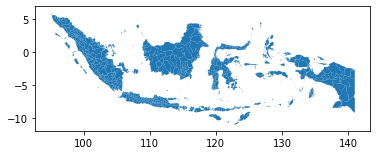

In [91]:
gdf2.plot()

### geopandas sudah terupload

## ganti nama kota jadi lower case

In [56]:
gdf2['name_2'] = gdf2['name_2'].str.lower().replace(' ','_')
gdf2['name_2'] = gdf2['name_2'].str.replace(' ','_')
gdf2.head()

,gid_2,gid_0,country,gid_1,name_1,nl_name_1,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geometry
0,IDN.1.2_1,IDN,Indonesia,IDN.1_1,Aceh,NA,aceh_barat,NA,NA,Kabupaten,Regency,1107,ID.AC.AB,"POLYGON ((96.06915 4.19539, 96.06725 4.19651, ..."
1,IDN.1.1_1,IDN,Indonesia,IDN.1_1,Aceh,NA,aceh_barat_daya,NA,NA,Kabupaten,Regency,1112,ID.AC.AD,"MULTIPOLYGON (((96.94196 3.57464, 96.94110 3.5..."
2,IDN.1.3_1,IDN,Indonesia,IDN.1_1,Aceh,NA,aceh_besar,NA,NA,Kabupaten,Regency,1108,ID.AC.AR,"MULTIPOLYGON (((95.78426 5.24092, 95.78445 5.2..."
3,IDN.1.4_1,IDN,Indonesia,IDN.1_1,Aceh,NA,aceh_jaya,NA,NA,Kabupaten,Regency,1116,ID.AC.AJ,"MULTIPOLYGON (((95.87673 4.36754, 95.87687 4.3..."
4,IDN.1.5_1,IDN,Indonesia,IDN.1_1,Aceh,NA,aceh_selatan,NA,NA,Kabupaten,Regency,1103,ID.AC.AS,"MULTIPOLYGON (((97.74693 2.44002, 97.74638 2.4..."


# Merge data gdf dan df

In [109]:
data2.dtypes

index
city                                                                                    object
pendapatan_daerah                                                                      float64
pad                                                                                    float64
pajak_daerah                                                                           float64
retribusi_daerah                                                                       float64
hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan                                      float64
lain-lain_pad_yang_sah                                                                 float64
tkdd                                                                                   float64
pendapatan_transfer_pemerintah_pusat                                                   float64
pendapatan_lainnya                                                                     float64
pendapatan_transfer_antar_daerah            

In [117]:
gdf2.dtypes

gid_2          object
gid_0          object
country        object
gid_1          object
name_1         object
nl_name_1      object
name_2         object
varname_2      object
nl_name_2      object
type_2         object
engtype_2      object
cc_2           object
hasc_2         object
geometry     geometry
dtype: object

<AxesSubplot:>

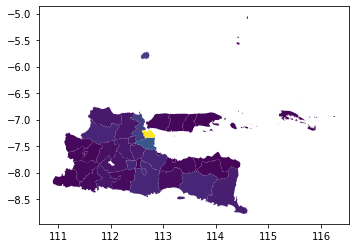

In [122]:
data3 = pd.merge(gdf2, data2, left_on='name_2', right_on='city', how='inner').reset_index()
#data3 = pd.merge(data2, gdf2, left_on='city', right_on='name_2', how='inner').reset_index()
data3.plot(column='pad')

<AxesSubplot:>

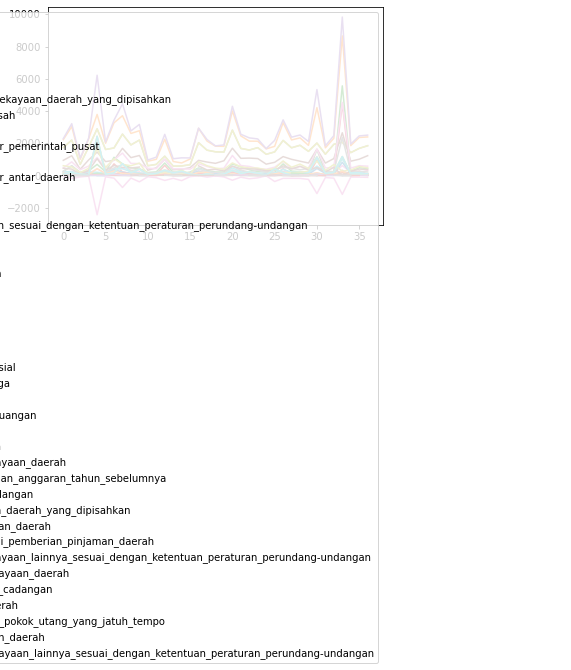

# Cek Distribution